In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

from utils import utils_v2
plt.rcParams['figure.figsize'] = (15, 7) 
%matplotlib inline


In [2]:
data = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')

In [3]:
data['timestamp'] = pd.to_datetime(data['Timestamp'],unit='s')
data.drop('Timestamp',axis=1,inplace = True)
data['Date'] = data.timestamp.dt.date

In [4]:
data = data.set_index('timestamp');

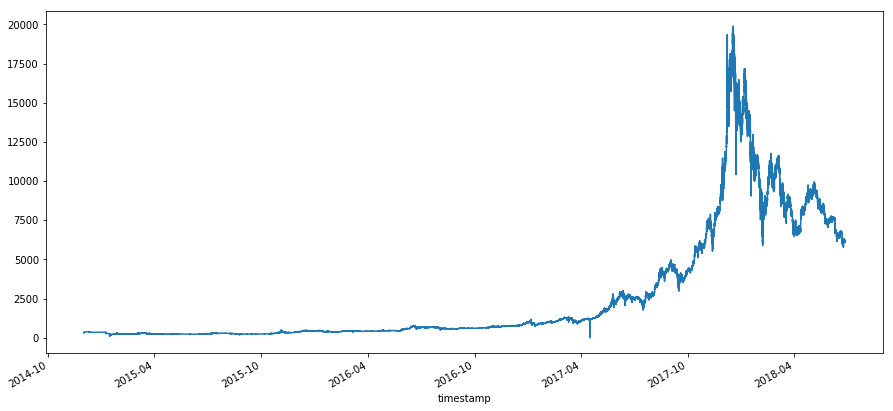

In [5]:
data['Weighted_Price'].plot(figsize=(15, 7));

In [6]:
table = pd.DataFrame(columns=['NDC','PC','MedianOSV_overall','MedianTM_overall','MedianT_overall','MedianR_DC_overall'])

In [29]:
date = '2017 Dec 29'

In [30]:
stock_series = data.loc[date]['Weighted_Price']

In [31]:
DCA, CPA = utils_v2.get_events(stock_series,threshold = 0.02)

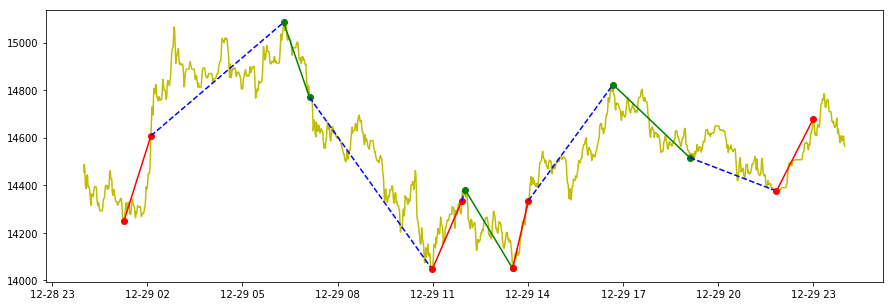

In [32]:
utils_v2.plot_events(stock_series,DCA,CPA)

In [23]:
table = utils_v2.event_summary(stock_series,DCA,CPA,table,threshold = 0.02)

In [24]:
table

,MedianOSV_overall,MedianR_DC_overall,MedianTM_overall,MedianT_overall,NDC,PC
2017-12-28,-0.030403,0.000012,-1.029795,00:58:00,22,0.890998
2017-12-29,0.018048,0.000004,0.021546,03:55:30,7,1.008844
2017-12-30,0.135566,0.000019,0.139224,00:38:00,15,0.921255


In [ ]:
sub_sub_DCA = []
sub_sub_CPA = []

for i in range(NDC-1):    
    
    sub_prices = prices[DCA[i]:DCA[i+1]+1]
    sub_times = times[DCA[i]:DCA[i+1]+1]
    
    LLpoint = 0
    LHpoint = 0
    
    Cpoint = 1
    Cevent = 'None'
    
    sub_DCA = []
    sub_CPA = []
    
    sub_threshold = threshold*0.25
    
    while Cpoint <= len(sub_prices)-1:
    
        if sub_prices[Cpoint] <= sub_prices[LHpoint]*(1-sub_threshold):
            Cevent = 'Down'
            sub_DCA.append(LHpoint)
            sub_CPA.append(Cpoint)
            Cpoint +=1;
            break
                
        if sub_prices[Cpoint] >= sub_prices[LLpoint]*(1+sub_threshold):
            Cevent = 'Up'
            sub_DCA.append(LLpoint)
            sub_CPA.append(Cpoint)
            Cpoint +=1;
            break
            
        #if sub_prices[Cpoint] > sub_prices[LHpoint]:
         #   LHpoint = Cpoint
                
        #if sub_prices[Cpoint] < sub_prices[LLpoint]:
         #   LLpoint = Cpoint
          
        Cpoint += 1
    
        
    while Cpoint <= len(sub_prices)-1:    
    
        if Cevent == 'Down':
            if sub_prices[Cpoint] >= sub_prices[LLpoint]*(1+sub_threshold):
                Cevent = 'Up'
                sub_DCA.append(LLpoint)
                sub_CPA.append(Cpoint)
                LHpoint = Cpoint
            
            else:
                if sub_prices[Cpoint] < sub_prices[LLpoint]:
                    LLpoint = Cpoint
            
        else:
            if sub_prices[Cpoint] <= sub_prices[LHpoint]*(1-sub_threshold):
                Cevent = 'Down'
                sub_DCA.append(LHpoint)
                sub_CPA.append(Cpoint)
                LLpoint = Cpoint    
            
            else:
                if sub_prices[Cpoint] > sub_prices[LHpoint]:
                    LHpoint = Cpoint
        
        Cpoint += 1
    
    sub_DCA.append(DCA[i+1])
    
    sub_sub_DCA.append(sub_DCA)
    sub_sub_CPA.append(sub_CPA)

In [ ]:
stock_series.index[0].strftime('%Y-%m-%d')

In [ ]:
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(stock_series,'y');



if len(sub_CPA) % 2 != 0:
    for i in range(0,len(sub_CPA),2):
        plt.plot([sub_times[sub_DCA[i]],sub_times[sub_CPA[i]]],[sub_prices[sub_DCA[i]],sub_prices[sub_CPA[i]]],'bo-')
        if i == len(sub_CPA)-1 :
            break
        plt.plot([sub_times[sub_CPA[i]],sub_times[sub_DCA[i+1]]],[sub_prices[sub_CPA[i]],sub_prices[sub_DCA[i+1]]],'k-')
        plt.plot([sub_times[sub_DCA[i+1]],sub_times[sub_CPA[i+1]]],[sub_prices[sub_DCA[i+1]],sub_prices[sub_CPA[i+1]]],'bo-')
        plt.plot([sub_times[sub_CPA[i+1]],sub_times[sub_DCA[i+2]]],[sub_prices[sub_CPA[i+1]],sub_prices[sub_DCA[i+2]]],'k-')

else:
    for i in range(0,len(sub_CPA),2):
        plt.plot([sub_times[sub_DCA[i]],sub_times[sub_CPA[i]]],[sub_prices[sub_DCA[i]],sub_prices[sub_CPA[i]]],'bo-')
        plt.plot([sub_times[sub_CPA[i]],sub_times[sub_DCA[i+1]]],[sub_prices[sub_CPA[i]],sub_prices[sub_DCA[i+1]]],'k-')
        plt.plot([sub_times[sub_DCA[i+1]],sub_times[sub_CPA[i+1]]],[sub_prices[sub_DCA[i+1]],sub_prices[sub_CPA[i+1]]],'bo-')
        if i == len(sub_CPA)-2 :
            break
        plt.plot([sub_times[sub_CPA[i+1]],sub_times[sub_DCA[i+2]]],[sub_prices[sub_CPA[i+1]],sub_prices[sub_DCA[i+2]]],'k--')

# Connect the last line:
plt.plot([sub_times[sub_CPA[-1]],sub_times[-1]],[sub_prices[sub_CPA[-1]],sub_prices[-1]],'k-')
        
if len(CPA) % 2 != 0:
    for i in range(0,len(CPA),2):
        plt.plot([times[DCA[i]],times[CPA[i]]],[prices[DCA[i]],prices[CPA[i]]],'ro-')
        if i == len(CPA)-1 :
            break
        plt.plot([times[CPA[i]],times[DCA[i+1]]],[prices[CPA[i]],prices[DCA[i+1]]],'g-')
        plt.plot([times[DCA[i+1]],times[CPA[i+1]]],[prices[DCA[i+1]],prices[CPA[i+1]]],'ro-')
        plt.plot([times[CPA[i+1]],times[DCA[i+2]]],[prices[CPA[i+1]],prices[DCA[i+2]]],'g-')

else:
    for i in range(0,len(CPA),2):
        plt.plot([times[DCA[i]],times[CPA[i]]],[prices[DCA[i]],prices[CPA[i]]],'ro-')
        plt.plot([times[CPA[i]],times[DCA[i+1]]],[prices[CPA[i]],prices[DCA[i+1]]],'g-')
        plt.plot([times[DCA[i+1]],times[CPA[i+1]]],[prices[DCA[i+1]],prices[CPA[i+1]]],'ro-')
        if i == len(CPA)-2 :
            break
        plt.plot([times[CPA[i+1]],times[DCA[i+2]]],[prices[CPA[i+1]],prices[DCA[i+2]]],'g-')

In [ ]:
a = [2,3,4,5,7,8]

In [ ]:
np.median(a)

In [25]:
from numpy.linalg import inv
a = np.array([[1., 2.], [3., 4.]])


In [26]:
a

array([[1., 2.],
       [3., 4.]])

In [27]:
inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [28]:
a*inv(a)

array([[-2. ,  2. ],
       [ 4.5, -2. ]])